In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
points = [18.0, 19.0, 14.0, 14.0, 11.0, 20.0, 28.0, 30.0, 31.0, 35.0, 33.0, 25.0, 25.0, 27.0, 29.0, 30.0, 19.0, 23.0]
assists = [3.0, 4.0, 5.0, 4.0, 7.0, 8.0, 7.0, 6.0, 9.0, 12.0, 14.0, 9.0, 4.0, 3.0, 4.0, 12.0, 15.0, 11.0]
rebounds = [15, 14, 10, 8, 14, 13, 9, 5, 4, 11, 6, 5, 3, 8, 12, 7, 6, 5]

# Create a DataFrame
df = pd.DataFrame({
    'points': points,
    'assists': assists,
    'rebounds': rebounds
})

In [3]:
def euclidean(a,b):
    return np.sqrt(np.sum((a-b)**2))

In [6]:
def k_means(data, k):
    np.random.seed(0)
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]

    for iteration in range(100):
        clusters = [[] for _ in range(k)]

        for point in data:
            distances = [euclidean(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

        new_centroids = []
        for cluster in clusters:
            if cluster: 
                new_centroids.append(np.mean(cluster, axis=0))
            else:
                new_centroids.append(data[np.random.choice(range(len(data)))])

        new_centroids = np.array(new_centroids)

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, clusters

In [5]:
def calc_sse(clusters, centroids):
    sse = 0

    for idx, cluster in enumerate(clusters):
        for point in cluster:
            sse += euclidean(point, centroids[idx])**2
    
    return sse

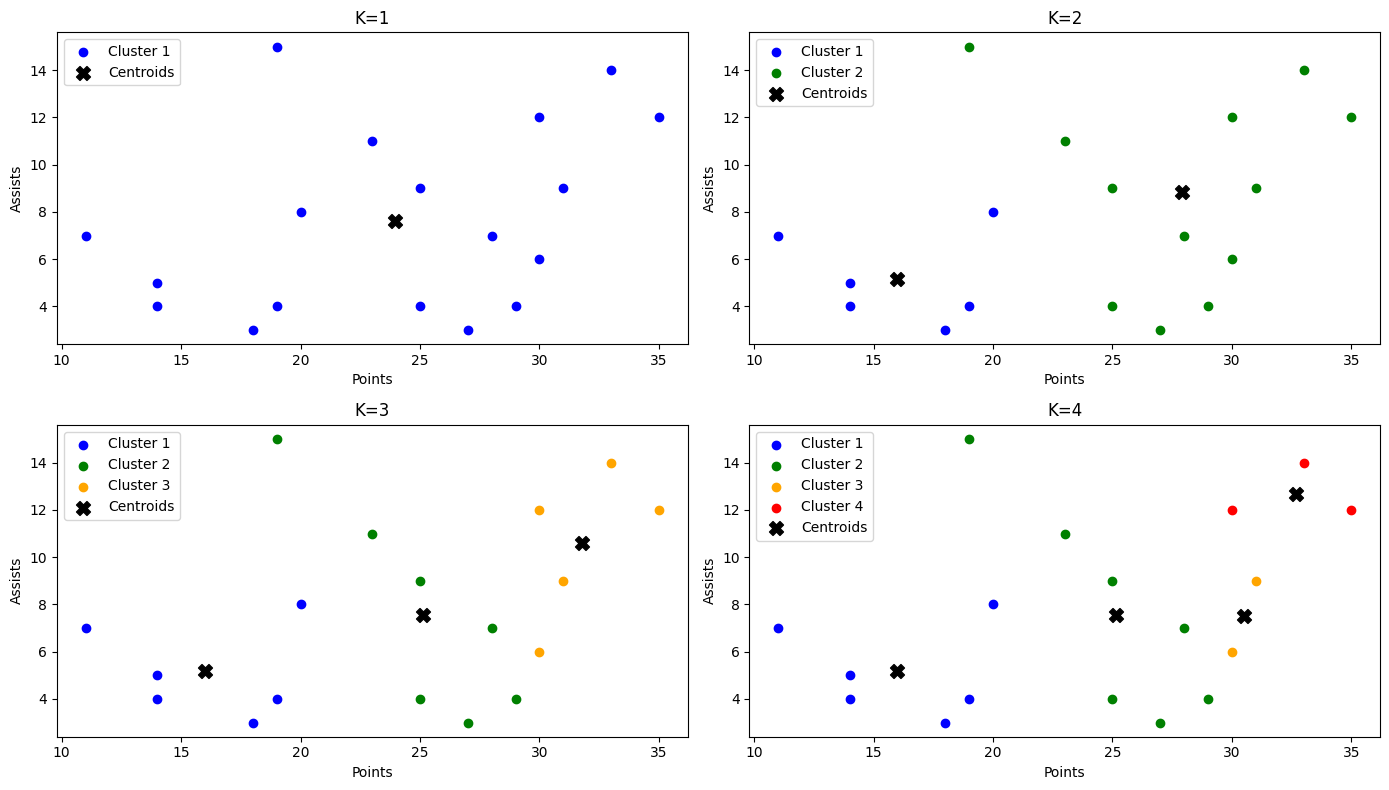

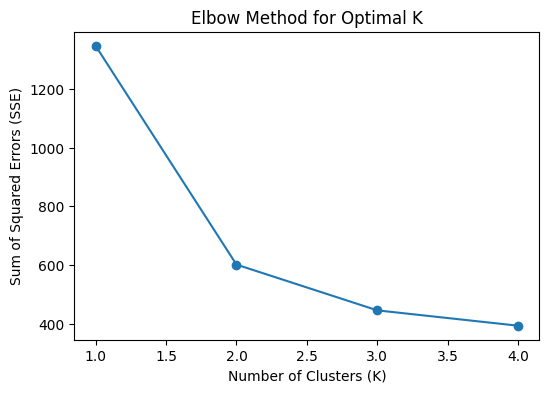

In [8]:
# Prepare data for K-means
data_points = df[['points', 'assists', 'rebounds']].values

# Run K-means for K=1 to K=4 and plot the results
sse_values = []
k_values = [1, 2, 3, 4]

plt.figure(figsize=(14, 8))

for k in k_values:
    # Run K-means
    centroids, clusters = k_means(data_points, k)
    
    # Calculate SSE
    sse = calc_sse(clusters, centroids)
    sse_values.append(sse)
    
    # Plot clusters for each K
    plt.subplot(2, 2, k)
    colors = ['blue', 'green', 'orange', 'red']
    for idx, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[idx % len(colors)], label=f'Cluster {idx+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')
    plt.title(f"K={k}")
    plt.xlabel("Points")
    plt.ylabel("Assists")
    plt.legend()

plt.tight_layout()
plt.show()

# Plot SSE vs K (Elbow Method)
plt.figure(figsize=(6, 4))
plt.plot(k_values, sse_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal K")
plt.show()
